# Algorytm przecinania się odcinków na płaszczyźnie

In [477]:
from enum import Enum
from functools import reduce

import numpy as np
import pandas as pd
import random

from sortedcontainers import SortedSet

from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [478]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

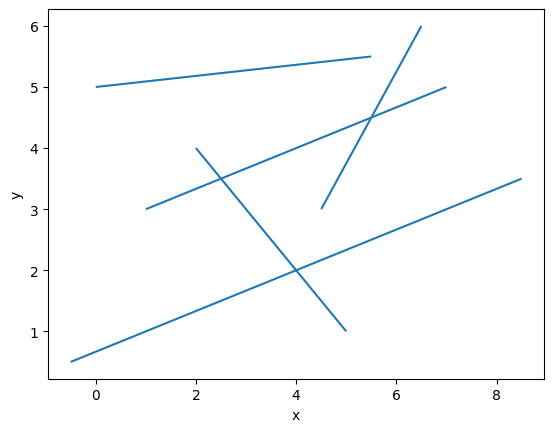

In [479]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

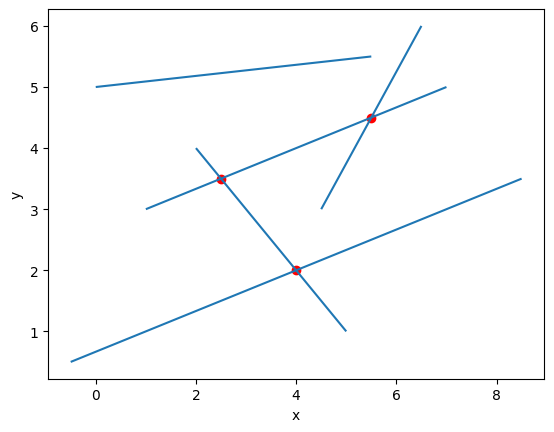

In [480]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [481]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    def gen_coordinate_list(limit):
        return [random.uniform(0, limit) for _ in range(n)]
    
    x1, x2 = gen_coordinate_list(max_x), gen_coordinate_list(max_x)
    y1, y2 = gen_coordinate_list(max_y), gen_coordinate_list(max_y)
    
    return [((x1[i], y1[i]), (x2[i], y2[i])) for i in range(n)]
    

In [482]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Time: 0.000s
Passed
	Test 3: Passed
Result: 3/3
Time: 0.047s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [483]:
section = generate_uniform_sections(1000, 1000, 20)

Zwizualizuj otrzymane odcinki

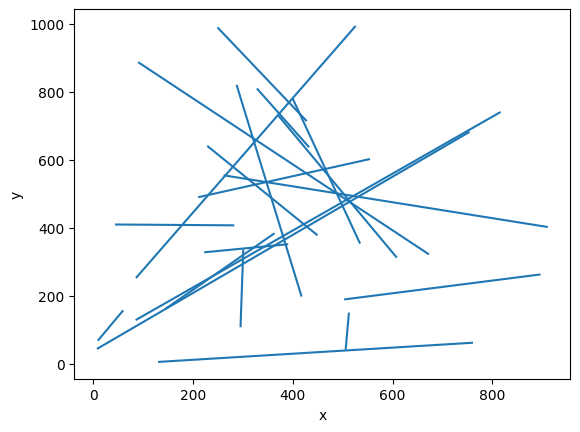

In [484]:
vis = Visualizer()
for e in section:
    vis.add_line_segment(e)
vis.show()

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką (jak?) TODO

In [485]:
# def add_sections(sections):

# TODO


Uzupełnij funkcję ```is_intersection```

In [486]:
def determinant(a, b, c):
    return (b[0] - a[0]) * (c[1] - a[1]) - (c[0] - a[0]) * (b[1] - a[1])

def orientation(a, b, c, eps=0):
    det = determinant(a, b, c)
    if det > eps:
        return 1
    elif det < eps:
        return -1
    
    return 0

In [487]:
# Given three collinear points a, b, c, the function checks if
# point c lies on line segment 'ab'
def is_on_segment(a, b, c):
    return min(a[0], b[0]) <= c[0] <= max(a[0], b[0]) and min(a[1], b[1]) <= c[1] <= max(a[1], b[1])
    

In [488]:
def check_intersection(A, B, eps=0):
    a_start = A[0]
    a_end = A[1]

    b_start = B[0]
    b_end = B[1]

    o1 = orientation(a_start, a_end, b_start)
    o2 = orientation(a_start, a_end, b_end)
    o3 = orientation(b_start, b_end, a_start)
    o4 = orientation(b_start, b_end, a_end)

    if o1 != o2 and o3 != o4:
        return True

    if -eps <= o1 <= eps and is_on_segment(a_start, a_end, b_start):
        return True

    if -eps <= o2 <= eps and is_on_segment(a_start, a_end, b_end):
        return True

    if -eps <= o3 <= eps and is_on_segment(b_start, b_end, a_start):
        return True

    if -eps <= o4 <= eps and is_on_segment(b_start, b_end, a_end):
        return True

    return False

In [489]:
def is_intersection(sections, eps=0):
    
    def add_line(current_line):
        T.add(current_line)
        index = T.index(current_line)
        
        if index - 1 >= 0 or index + 1 < len(T): # Po dodaniu lini sprawdzamy
            return check_intersection(T[index - 1], current_line)
        
        return False
    
    def remove_line(current_line):
        index = T.index(current_line)
        
        if index - 1 >= 0 and index + 1 < len(T): # Po usunięciu lini sprawdzamy
            return check_intersection(T[index - 1], T[index + 1])
        
        T.remove(current_line)
        return False
    
    def state(current_event):
        if current_event[0] == current_event[1][0][0]:
            return add_line(current_event[1])
        
        else:
            return remove_line(current_event[1])
        
    from sortedcontainers import SortedSet
    from queue import PriorityQueue

    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
        
    Q = PriorityQueue()
    T = SortedSet(key=lambda x: x[0][1])
    
    lines = dict()
    
    for line in sections:
        Q.put((line[0][0], line[0]))
        Q.put((line[1][0], line[1]))
        
        lines[line[0]] = line
        lines[line[1]] = line
            
    while not Q.empty():
        event = Q.get()
        
        x, point = event
        
        if state((x, lines[point])):
            return True
            
    return False

In [490]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [491]:
def is_intersection_with_visualization(sections): # TODO wizualizacja (jak?)
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    
    raise Exception("Unimplemented")

Uzupełnij funkcję ```find_intersections```

In [492]:

class Edge_side(Enum):
    START = 0
    END = 1

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
class Line:
    def __init__(self, start_point, end_point):
        self.start = min(start_point, end_point, key=lambda p: p.x)
        self.end = max(start_point, end_point, key=lambda p: p.x)
        
    def get_value_at(self, x):
        a = (self.end.y - self.start.y) / (self.end.x - self.start.x)
        b = self.start.y - a * self.start.x
        return a * x + b
    

In [493]:

def determinant2(a, b, c):
    return (b.x - a.x) * (c.y - a.y) - (c.x - a.x) * (b.y - a.y)

def is_on_segment2(a, b, c):
    return min(a.x, b.x) <= c.x <= max(a.x, b.x) and min(a.y, b.y) <= c.y <= max(a.y, b.y)

def orientation2(a, b, c):
    det = determinant2(a, b, c)
    if det > 0:
        return 1
    elif det < 0:
        return -1
    
    return 0

In [494]:
def check_intersection2(A, B):
    a_start = A.start
    a_end = A.end
    
    b_start = B.start
    b_end = B.end
    
    o1 = orientation2(a_start, a_end, b_start)
    o2 = orientation2(a_start, a_end, b_end)
    o3 = orientation2(b_start, b_end, a_start)
    o4 = orientation2(b_start, b_end, a_end)
    
    if o1 != o2 and o3 != o4:
        return True
    
    if o1 == 0 and is_on_segment2(a_start, a_end, b_start):
        return True
    
    if o2 == 0 and is_on_segment2(a_start, a_end, b_end):
        return True
    
    if o3 == 0 and is_on_segment2(b_start, b_end, a_start):
        return True
    
    if o4 == 0 and is_on_segment2(b_start, b_end, a_end):
        return True
    
    return False

In [495]:
def intersection_point(A, B):
    a1 = (A.end.y - A.start.y) / (A.end.x - A.start.x)
    b1 = A.start.y - a1 * A.start.x
    
    a2 = (B.end.y - B.start.y) / (B.end.x - B.start.x)
    b2 = B.start.y - a2 * B.start.x
    
    x = (b2 - b1) / (a1 - a2)
    y = a1 * x + b1
    
    return Point(x, y)

In [496]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def lines(self, line_1, line_2):
        self.line_1 = line_1
        self.line_2 = line_2
        
    def get_lines(self):
        return self.line_1, self.line_2

    def __eq__(self, point):
        return self.x == point.x and self.y == point.y

    def __le__(self, point):
        return self.x <= point.x

    def __hash__(self):
        return self.x.__hash__() * self.y.__hash__()

    def to_tuple(self):
        return self.x, self.y
    
class Line:
    def __init__(self, point_1, point_2):
        if point_1.x < point_2.x:
            self.point_1 = point_1
            self.point_2 = point_2
        else:
            self.point_1 = point_2
            self.point_2 = point_1

    def get_y(self, x):
        a = (self.point_2.y - self.point_1.y) / (self.point_2.x - self.point_1.x)
        b = self.point_2.y - a * self.point_2.x
        return a * x + b

    def to_tuple(self):
        return self.point_1.to_tuple(), self.point_2.to_tuple()
    
    
def convert_to_point_lines(lines):
    for idx, line in enumerate(lines):
        point_1 = Point(line[0][0], line[0][1])
        point_2 = Point(line[1][0], line[1][1])
        lines[idx] = Line(point_1, point_2)
        
    return lines
    
class Broom:
    def __init__(self):
        # Struktura stanu
        self.T = SortedSet()
        # Struktura zdarzeń
        self.Q = SortedSet(key=lambda point: -point.x)
        
        self.lines = dict()
        self.intersection = set()
        self.lines_idx = dict()

    def sweep(self, lines):
        for idx, line in enumerate(lines):
            self.lines[line.point_1] = line
            self.lines[line.point_2] = line
            
            self.Q.add(line.point_1)
            self.Q.add(line.point_2)
            
            self.lines_idx[line.point_1] = idx
            self.lines_idx[line.point_2] = idx


        active_lines = SortedSet(key=lambda line: line.get_y(self.Q[0].x))
        active_lines.update(self.T)
        self.T = active_lines

        while len(self.Q) > 0:
            event = self.Q.pop()
            self.state(event)
            
        return self.intersection

    def state(self, event):
        
        if event in self.lines:
            line = self.lines[event]
            active_lines = SortedSet(key=lambda line: line.get_y(event.x))
            active_lines.update(self.T)
            self.T = active_lines
            
            if event == line.point_1:
                self.add_line(line)
            else:
                self.remove_line(line)
                
        else:
            self.intersection.add(event)
            line_1 = event.line_1
            self.remove_line(line_1)
            line_2 = event.line_2
            self.remove_line(line_2)

            active_lines = SortedSet(key=lambda line: line.get_y(event.x + 10**(-12)))
            active_lines.update(self.T)
            self.T = active_lines

            self.add_line(line_1)
            self.add_line(line_2)

    def lines_intersection(self, line_1, line_2):
        orientation_11 = orientation(line_1.point_1.to_tuple(), line_1.point_2.to_tuple(), line_2.point_1.to_tuple())
        orientation_12 = orientation(line_1.point_1.to_tuple(), line_1.point_2.to_tuple(), line_2.point_2.to_tuple())
        orientation_21 = orientation(line_2.point_1.to_tuple(), line_2.point_2.to_tuple(), line_1.point_1.to_tuple())
        orientation_22 = orientation(line_2.point_1.to_tuple(), line_2.point_2.to_tuple(), line_1.point_2.to_tuple())

        if orientation_11 != orientation_12 and orientation_21 != orientation_22:
            a_1 = (line_1.point_2.y - line_1.point_1.y) / (line_1.point_2.x - line_1.point_1.x)
            b_1 = line_1.point_1.y - a_1 * line_1.point_1.x

            a_2 = (line_2.point_2.y - line_2.point_1.y) / (line_2.point_2.x - line_2.point_1.x)
            b_2 = line_2.point_1.y - a_2 * line_2.point_1.x

            x = (b_2 - b_1) / (a_1 - a_2)
            y = a_1 * (b_2 - b_1) / (a_1 - a_2) + b_1

            point = Point(x, y)
            point.lines(line_1, line_2)
            self.lines_idx[point] = (self.lines_idx[line_1.point_1], self.lines_idx[line_2.point_2])
            
            return point
        
        return None

    def add_line(self, line):
        self.T.add(line)
        
        index = self.T.index(line)

        if index - 1 >= 0 and index + 1 < len(self.T):
            intersection = self.lines_intersection(self.T[index - 1], self.T[index + 1])
            if intersection is not None and intersection in self.Q:
                self.Q.remove(intersection)

        if index - 1 >= 0:
            intersection = self.lines_intersection(self.T[index - 1], line)
            if intersection is not None and intersection not in self.Q and intersection not in self.intersection:
                self.Q.add(intersection)
                
        if index + 1 < len(self.T):
            intersection = self.lines_intersection(line, self.T[index + 1])
            if intersection is not None and intersection not in self.Q and intersection not in self.intersection:
                self.Q.add(intersection)

    def remove_line(self, line):
        index = self.T.index(line)

        if index - 1 >= 0 and index + 1 < len(self.T):
            intersection = self.lines_intersection(self.T[index - 1], self.T[index + 1])
            if intersection is not None and intersection not in self.intersection:
                self.Q.add(intersection)
                
        self.T.remove(line)

In [497]:
def find_intersections(sections):
    
    lines = convert_to_point_lines(sections)
    
    broom = Broom()
    
    broom.sweep(lines)
    
    result = []
    
    intersection_points = set(broom.intersection)
    
    for point in intersection_points:
        result.append((point.to_tuple(), *broom.lines_idx[point]))
        
    return result

In [498]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: WRONG ANSWER
		Output:   [((0.011526074740254208, 0.006132801296422439), 1, 2), ((0.022344451130778698, 0.01711175484919488), 1, 3), ((0.022344451130778698, 0.017111754849195027), 3, 1), ((0.022658670631229855, -0.02681736354721217), 0, 3), ((0.022658670631229855, -0.026817363547212647), 3, 0), ((0.011860591253227505, -0.01814014322949553), 2, 0), ((-0.0016743790516658117, -0.007263586832941072), 0, 1), ((0.011860591253227505, -0.018140143229495424), 0, 2), ((0.011526074740254208, 0.006132801296422352), 2, 1)]
		Expected: ['-0.0016743790516658117 -0.007263586832941072 1 2', '0.011526074740254208 0.006132801296422439 2 3', '0.011860591253227505 -0.018140143229495424 1 3', '0.022344451130778698 0.01711175484919488 2 4', '0.022658670631229855 -0.026817363547212168 1 4']
	Test 2: WRONG ANSWER
		Output:   [((0.010025601838031018, -0.020988202988542273), 1, 3), ((0.010025601838031018, -0.02098820298854228), 3, 1), ((0.013332591183346312, -0.01619339562692305), 2, 3), 

Uzupełnij funkcję ```find_intersections_with_visualization```

In [499]:
def find_intersections_with_visualization(sections): # TODO wizualizacja (jak?)
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    
    


### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [500]:
# testing_sections = ???

In [501]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.